In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/content/uber.csv')

In [35]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [37]:
df=df.dropna()

In [38]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [39]:
display(df.shape)

df = df[(df.pickup_latitude<=90) & (df.dropoff_latitude<=90)
        & (df.pickup_latitude>=-90) & (df.dropoff_latitude>=-90)
        & (df.pickup_longitude<=180) & (df.dropoff_longitude<=180)
        & (df.pickup_longitude>=-180) & (df.dropoff_longitude>=-180)]

display(df.shape)

(199999, 9)

(199987, 9)

In [40]:
from sklearn.metrics.pairwise import haversine_distances as hd
from math import radians

In [41]:
def hd(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

distances_km = []
for row in df.itertuples(index=False):
   distances_km.append(
       hd(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude)
)
   
distances_km

[1.68,
 2.46,
 5.04,
 1.66,
 4.48,
 0.0,
 11.73,
 0.0,
 2.33,
 4.89,
 2.25,
 0.0,
 0.3,
 3.58,
 1.31,
 1.72,
 0.73,
 2.52,
 1.79,
 1.03,
 2.49,
 0.96,
 1.26,
 1.75,
 6.19,
 2.74,
 0.72,
 3.23,
 1.43,
 2.23,
 13.05,
 1.9,
 1.9,
 3.18,
 11.36,
 2.92,
 1.2,
 2.64,
 2.25,
 9.96,
 4.83,
 1.25,
 0.8,
 0.84,
 0.39,
 2.43,
 3.13,
 3.73,
 0.0,
 4.5,
 1.56,
 4.92,
 7.68,
 1.82,
 4.52,
 4.07,
 1.17,
 1.29,
 1.21,
 0.87,
 2.11,
 5.9,
 0.69,
 5.63,
 0.76,
 0.0,
 1.03,
 5.85,
 3.1,
 2.07,
 1.51,
 3.31,
 0.51,
 1.91,
 6.15,
 6.1,
 1.96,
 4.58,
 4.25,
 0.9,
 2.5,
 0.42,
 15.9,
 4.74,
 0.0,
 2.94,
 1.3,
 6.9,
 1.81,
 1.35,
 1.4,
 1.09,
 0.0,
 1.26,
 1.23,
 2.18,
 0.59,
 0.71,
 11.1,
 5.52,
 2.02,
 0.57,
 0.49,
 2.8,
 11.88,
 2.15,
 0.99,
 1.71,
 0.63,
 2.52,
 5.56,
 1.29,
 2.2,
 16.06,
 1.36,
 0.83,
 2.34,
 1.76,
 3.21,
 1.95,
 0.0,
 2.4,
 1.47,
 1.97,
 3.74,
 2.18,
 1.22,
 1.15,
 2.12,
 3.57,
 1.57,
 1.01,
 3.51,
 0.0,
 1.78,
 3.67,
 3.77,
 5.06,
 2.72,
 4.72,
 2.18,
 1.71,
 1.19,
 1.64,
 3.07,
 9.92,

In [42]:
df["distance"] = distances_km

df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Unnamed: 0              AxesSubplot(0.125,0.787927;0.352273x0.0920732)
fare_amount          AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_longitude        AxesSubplot(0.125,0.677439;0.352273x0.0920732)
pickup_latitude      AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_longitude       AxesSubplot(0.125,0.566951;0.352273x0.0920732)
dropoff_latitude     AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
passenger_count         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
distance             AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
dtype: object

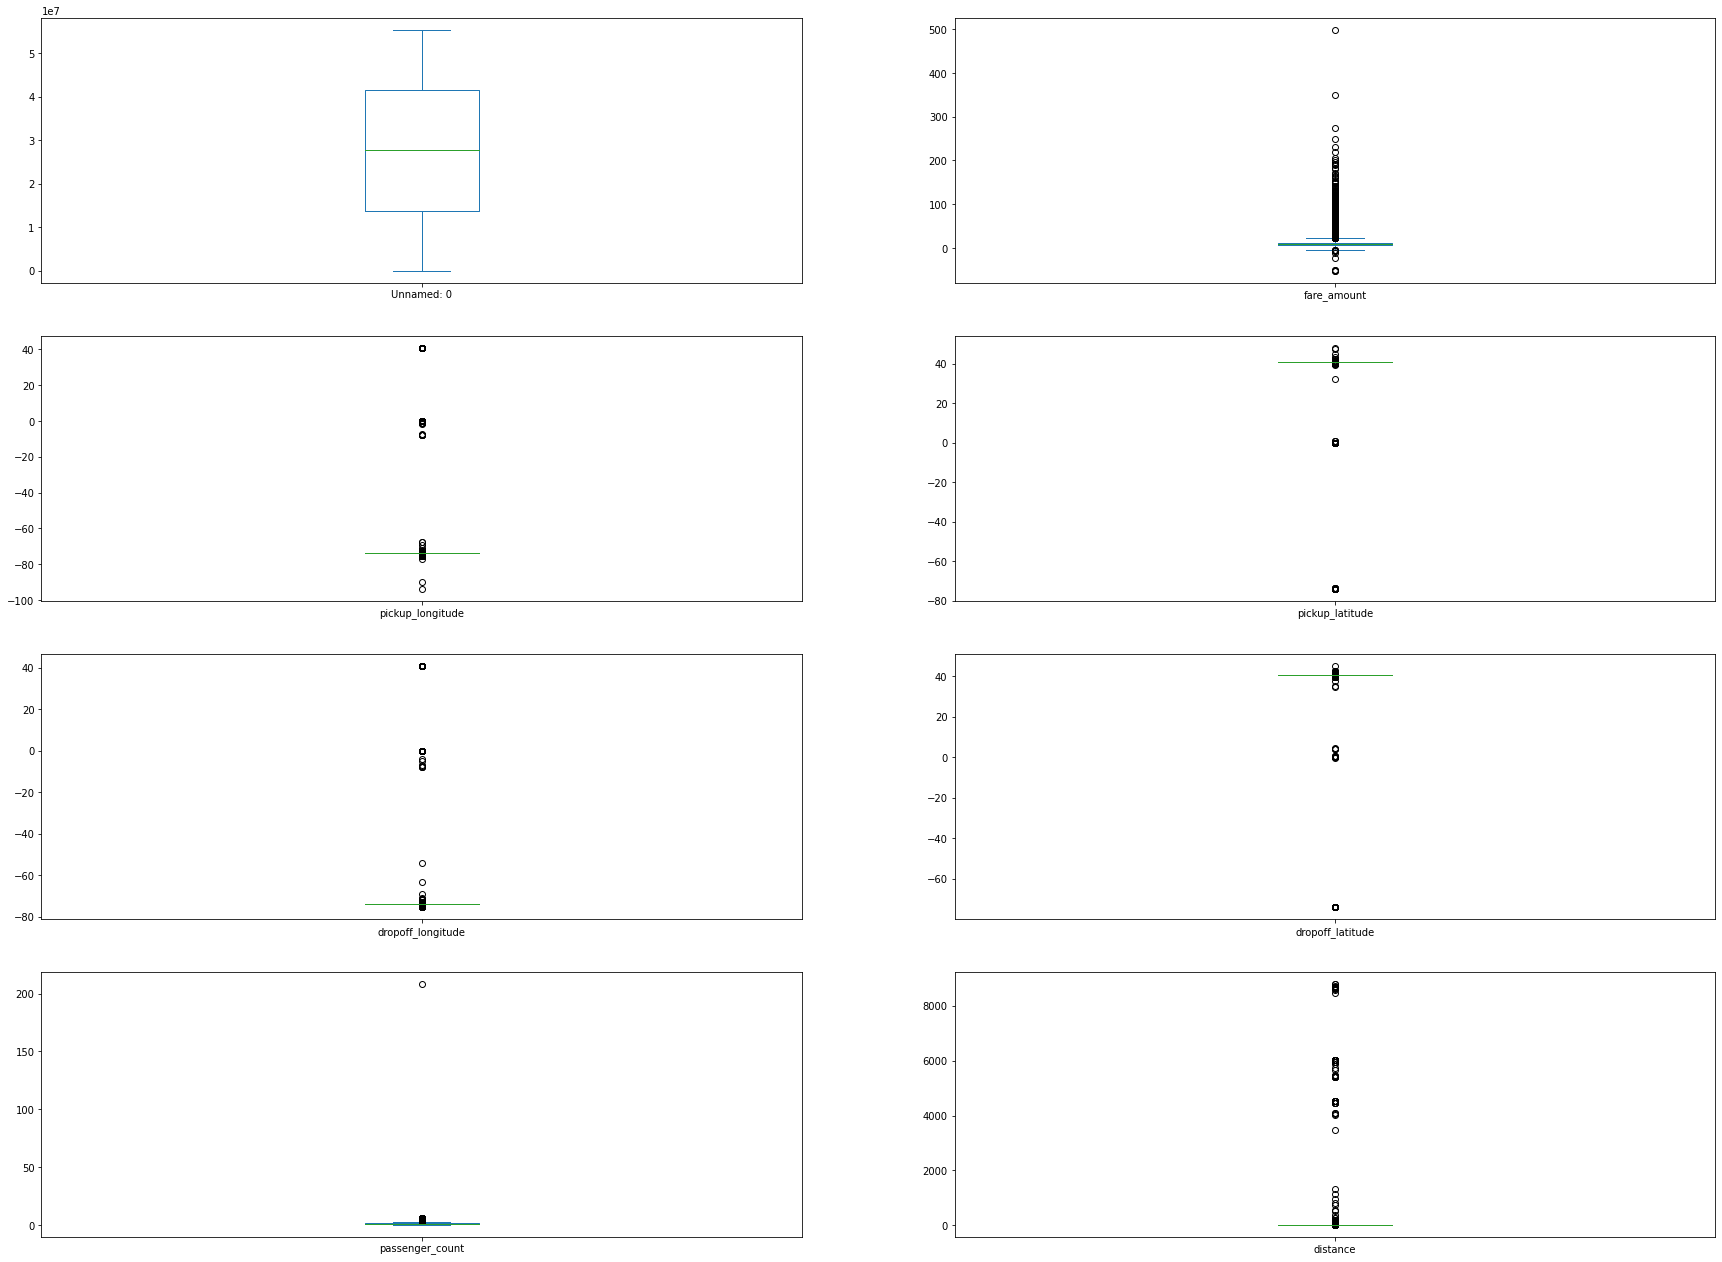

In [43]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(30,40))

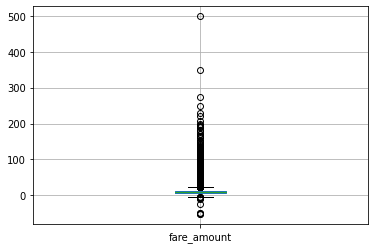

In [44]:
a = df.boxplot(column=['fare_amount'])


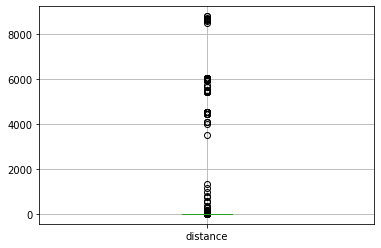

In [45]:
a = df.boxplot(column=['distance'])

In [46]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
Unnamed: 0,1.000000,0.000609,-0.000051,0.000091,0.000595,-0.000409,0.002229,-0.000933
fare_amount,0.000609,1.000000,0.011635,-0.011562,0.011870,-0.012258,0.010167,0.024720
pickup_longitude,-0.000051,0.011635,1.000000,-0.979048,0.949698,-0.936642,-0.000757,0.163547
pickup_latitude,0.000091,-0.011562,-0.979048,1.000000,-0.936690,0.958143,-0.000522,-0.142200
dropoff_longitude,0.000595,0.011870,0.949698,-0.936690,1.000000,-0.979692,-0.000374,0.140680
dropoff_latitude,-0.000409,-0.012258,-0.936642,0.958143,-0.979692,1.000000,-0.001387,-0.124660
passenger_count,0.002229,0.010167,-0.000757,-0.000522,-0.000374,-0.001387,1.000000,-0.001619
distance,-0.000933,0.024720,0.163547,-0.142200,0.140680,-0.124660,-0.001619,1.000000


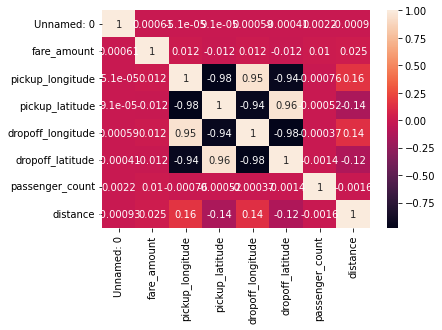

In [47]:
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'fare_amount')

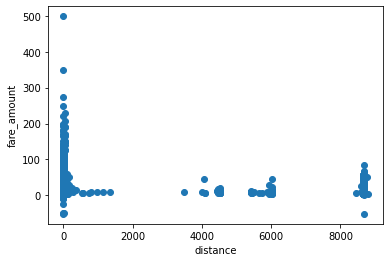

In [48]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

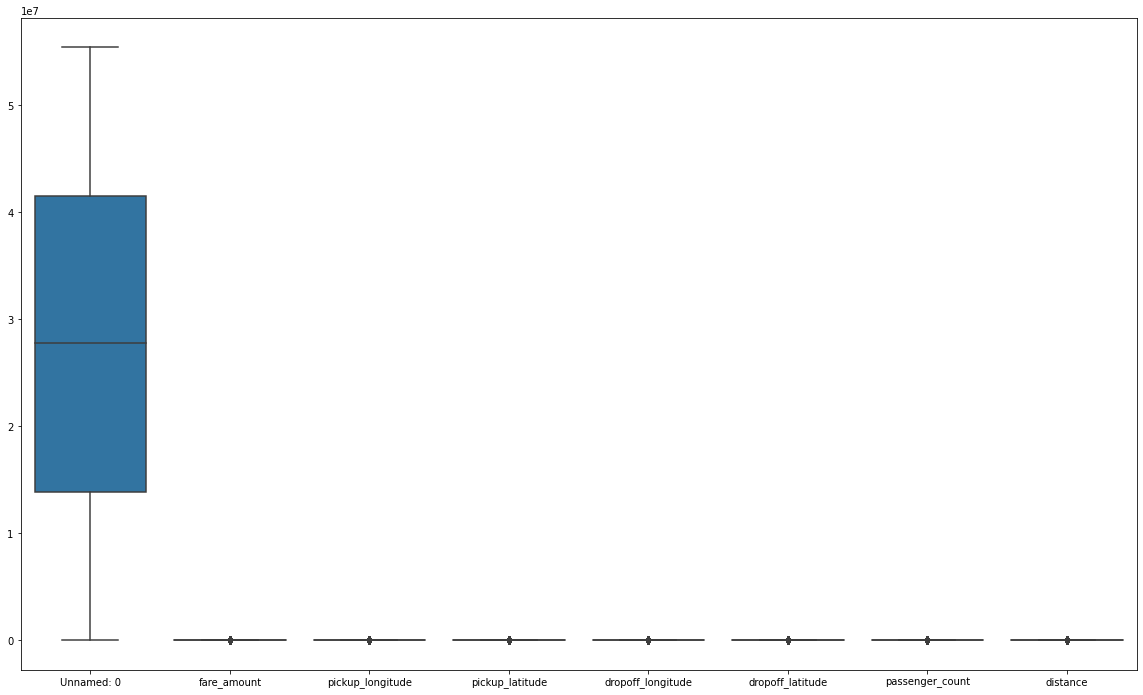

In [49]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

Text(0, 0.5, 'fare_amount')

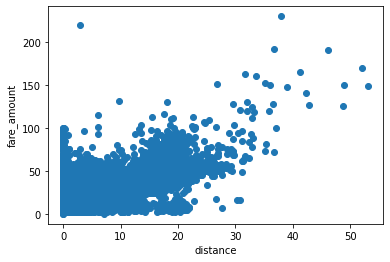

In [50]:
df.drop(df[df['distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['distance']>100)].index, inplace = True )
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [51]:
df.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
Unnamed: 0,1.000000,0.000429,0.000323,-0.000263,0.000336,-0.000268,0.002155,-0.000832
fare_amount,0.000429,1.000000,0.005885,-0.006220,0.005501,-0.006141,0.011692,0.857906
pickup_longitude,0.000323,0.005885,1.000000,-0.981953,0.999992,-0.981941,-0.000649,-0.117060
pickup_latitude,-0.000263,-0.006220,-0.981953,1.000000,-0.981954,0.999987,-0.001052,0.109211
dropoff_longitude,0.000336,0.005501,0.999992,-0.981954,1.000000,-0.981942,-0.000651,-0.117298
dropoff_latitude,-0.000268,-0.006141,-0.981941,0.999987,-0.981942,1.000000,-0.001035,0.109501
passenger_count,0.002155,0.011692,-0.000649,-0.001052,-0.000651,-0.001035,1.000000,0.007804
distance,-0.000832,0.857906,-0.117060,0.109211,-0.117298,0.109501,0.007804,1.000000


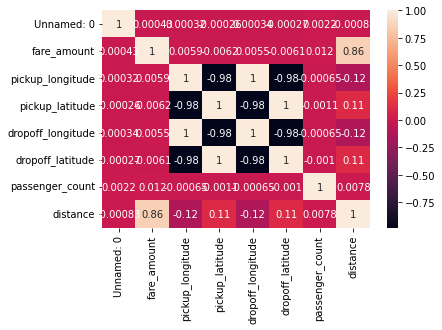

In [52]:
sns.heatmap(df.corr(),annot=True)

In [53]:
X = df['distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.39820899]
 [-0.37738617]
 [ 0.16400735]
 ...
 [ 2.03806183]
 [ 0.33058997]
 [ 0.28894432]]
[[-0.43916137]
 [-0.22191511]
 [ 0.49666867]
 ...
 [ 2.67191647]
 [ 0.0788874 ]
 [ 0.60250659]]


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.7390262


In [56]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result

,Actual,Predicted
0,-0.335741,-0.490623
1,1.496668,1.723848
2,0.486761,-0.137833
3,-0.210804,-0.011496
4,-0.294095,-0.264170
...,...,...
39885,2.308759,1.168442
39886,-0.710551,-0.776669
39887,-0.169158,0.081468
39888,-0.377386,-0.195042


In [57]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.2657021744368773
Mean Absolute % Error: 2.0013151420834894
Mean Squared Error: 0.2655774087824274
Root Mean Squared Error: 0.5153420308711754
R Squared (R²): 0.8596663349569832


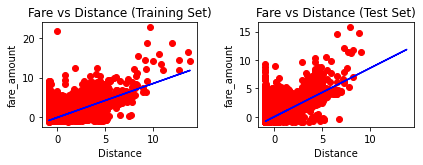

In [58]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.show()

In [59]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_metrics = pd.DataFrame([[
     "Linear Regresion model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
     np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.515342,0.859666


In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=10)

In [65]:
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

print(result.sample(10))

print("Training set score: {:.2f}".format(rf_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(rf_reg.score(X_test, y_test)))

         Actual  Predicted
38932  1.944359   1.869520
904   -0.627260  -0.546976
25643  0.382647   0.079898
9090   4.026642   4.294002
10080  1.007332   0.516038
38717 -0.710551  -0.664601
12031 -0.543969  -0.392277
11445 -0.127512  -0.089881
6784  -0.710551  -0.691752
33385  0.122362  -0.141749
Training set score: 0.78
Test set score: 0.7519328


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.25722972881552364
Mean Absolute % Error: 1.7452928998277177
Mean Squared Error: 0.2524431032017956
Root Mean Squared Error: 0.502437163436181
R Squared (R²): 0.8671406103783053


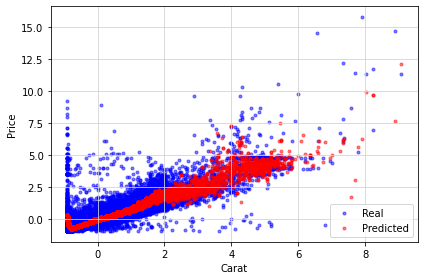

In [63]:
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

In [64]:
random_forest_metrics = pd.DataFrame([[
     "Random Forest Regressor model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
     np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.515342,0.859666
1,Random Forest Regressor model,0.502437,0.867141
